In [218]:
import pandas as pd

In [219]:
import numpy as np

In [220]:
data= 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [221]:
!wget $data

--2025-10-04 15:22:20--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.4’

car_fuel_efficiency 100%[===================>] 853.70K  3.41MB/s    in 0.2s    

2025-10-04 15:22:21 (3.41 MB/s) - ‘car_fuel_efficiency.csv.4’ saved [874188/874188]



In [222]:
df=pd.read_csv('car_fuel_efficiency.csv')

In [223]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [224]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [225]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [226]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

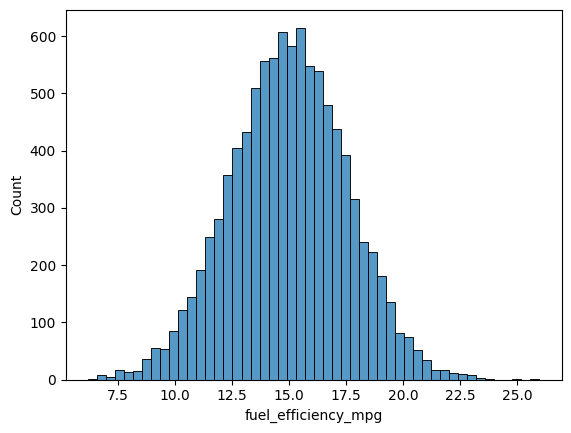

In [228]:
sns.histplot(df.fuel_efficiency_mpg,bins=50)

There's one column with missing values. What is it?   
#horsepower

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [229]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199

In [230]:
df.horsepower.median()

np.float64(149.0)

Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [231]:
n=len(df)

n_val= int(n*0.2)
n_test= int(n*0.2)
n_train= n-n_val-n_test

In [232]:
n,n_train,n_test,n_val

(9704, 5824, 1940, 1940)

In [233]:
idx=np.arange(n)

In [234]:
np.random.seed(42)
np.random.shuffle(idx)

In [235]:
df_train=df.iloc[idx[:n_train]]
df_val=df.iloc[idx[n_train:n_train+n_val]]
df_test=df.iloc[idx[n_train+n_val:]]

In [236]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
1696,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0,16.964054
5685,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0,10.059094
6735,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0,17.593237
2052,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748


In [237]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [238]:
y_train = (df_train.fuel_efficiency_mpg.values)
y_val =(df_val.fuel_efficiency_mpg.values)
y_test = (df_test.fuel_efficiency_mpg.values)

In [239]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [240]:
df_train.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?
Options:

With 0
With mean
Both are equally good

In [241]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [242]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [243]:
w0,w

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

<Axes: ylabel='Count'>

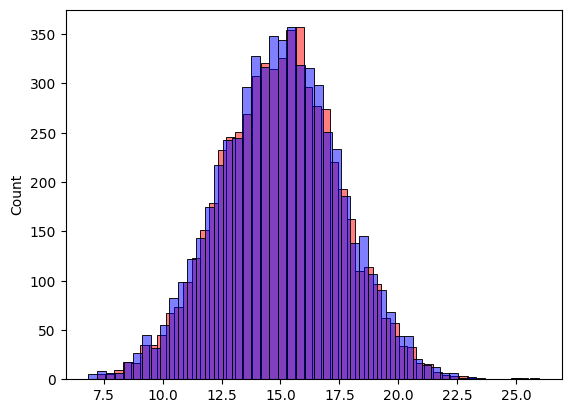

In [244]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [245]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [246]:
rmse(y_train, y_pred)

np.float64(0.5202614265099076)

fill null value with median

In [247]:
base = ['engine_displacement','horsepower','vehicle_weight','model_year']

X_train2 = df_train[base].fillna(df_train[base].mean()).values

w0, w = train_linear_regression(X_train2, y_train)

y_pred2 = w0 + X_train2.dot(w)

<Axes: ylabel='Count'>

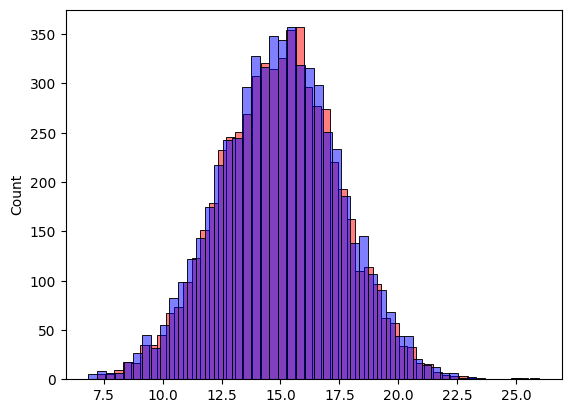

In [248]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [249]:
rmse(y_train, y_pred2)

np.float64(0.4624412137959964)

Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If multiple options give the same best RMSE, select the smallest r.
#0.01
Options:

0
0.01
1
10
100

In [250]:
df.model_year.min()

np.int64(2000)

In [251]:
def prepare_X(df):
    # df = df.copy()
    
    # df['age'] = 2000 - df['model_year']
    # features = base + ['age']

    # df_num = df[features]
    # df_num = df_num.fillna(0)
    # X = df_num.values

    # return X
    return df[base].fillna(0).values

In [252]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [253]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 28.82736547365895 0.5173782638844466
0.01 24.92683841981215 0.5171115525769823
0.1 11.239661084581073 0.5187525130702517
1 1.7315979411219746 0.5222348802093141
5 0.3638075020482907 0.522891609282361
10 0.18306246621686947 0.5229812979636599
100 0.01841801730688404 0.5230636233819933


In [254]:
r = 0.01
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.5171115525769823)

Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

0.001
0.006
0.060
0.600
Note: Stand

In [255]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    # 1. Split the data (60% train / 20% val / 20% test)
    
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    
    # 2. Prepare features (Fill missing values with 0)
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)

    # 3. Train the model without regularization
    w0, w = train_linear_regression_reg(X_train, y_train,r=0)  

    # 4. Evaluate the model on the validation dataset
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

# 5. Compute the standard deviation of all scores
std_rmse = np.std(rmse_scores)

# 6. Round the result to 3 decimal digits
result = round(std_rmse, 3)

print(f"The standard deviation of the RMSE scores is: {result}")


The standard deviation of the RMSE scores is: 0.007


Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.15
0.515
5.15
51.5

In [256]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# 2. Combine train and validation sets
df_train_combined = pd.concat([df_train, df_val])
df_train_combined = df_train_combined.reset_index(drop=True)

X_train = prepare_X(df_train_combined)
y_full_train = np.concatenate([y_train, y_val])

X_test = prepare_X(df_test)
y_test = df_test.fuel_efficiency_mpg.values

# 4. Train linear regression with r=0.001
w0, w = train_linear_regression_reg(X_train, y_full_train, r=0.001)

# 5. Evaluate RMSE on test dataset
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)


print("RMSE on test dataset:", round(score, 3))

RMSE on test dataset: 0.516
